In [248]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%notebook inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.svm import SVC
from warnings import simplefilter
simplefilter(action='ignore', category=DeprecationWarning)

In [6]:
df = pd.read_csv("iris.csv")

In [260]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Checking for null values

In [106]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

Checking different types of species

In [16]:
df["species"].unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

eda

In [261]:
sns.set_style("darkgrid")
sns.set(font_scale=1)

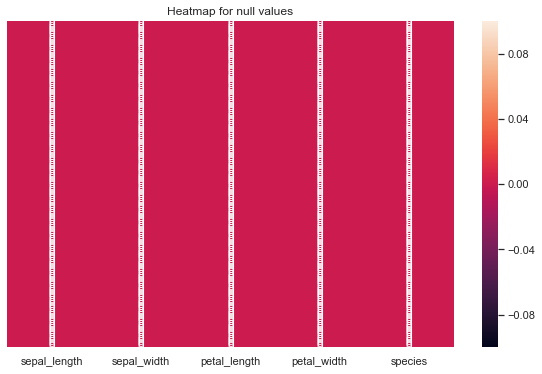

In [269]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("Heatmap for null values")
sns.heatmap(df.isna(), yticklabels=False, annot=True)
plt.show()

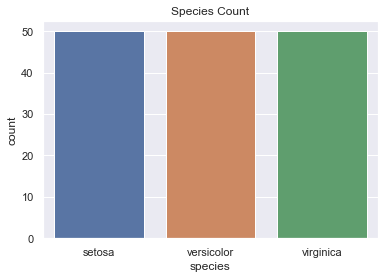

In [263]:
plt.title('Species Count')
sns.countplot(df['species']);

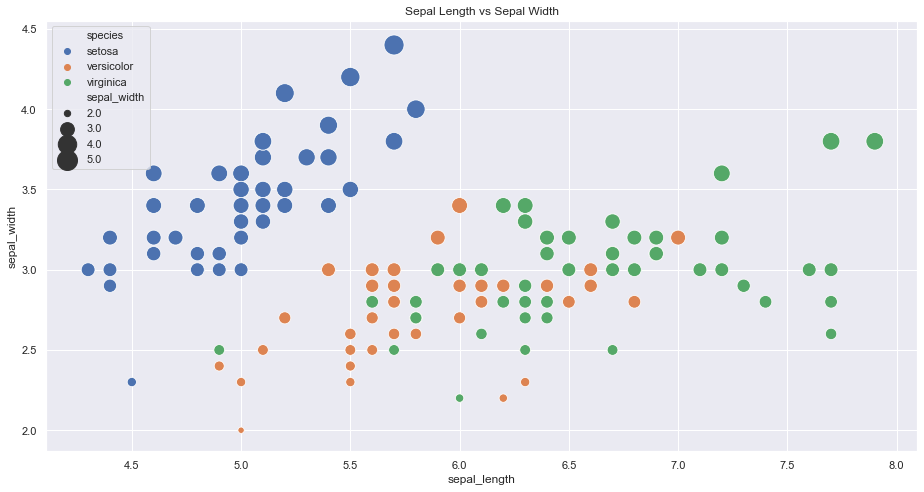

In [266]:
plt.figure(figsize=(13,7))
sns.scatterplot(x="sepal_length", y="sepal_width", data = df, size="sepal_width", hue = "species", 
            sizes=(40, 400))
plt.title("Sepal Length vs Sepal Width")
plt.tight_layout()
plt.show()

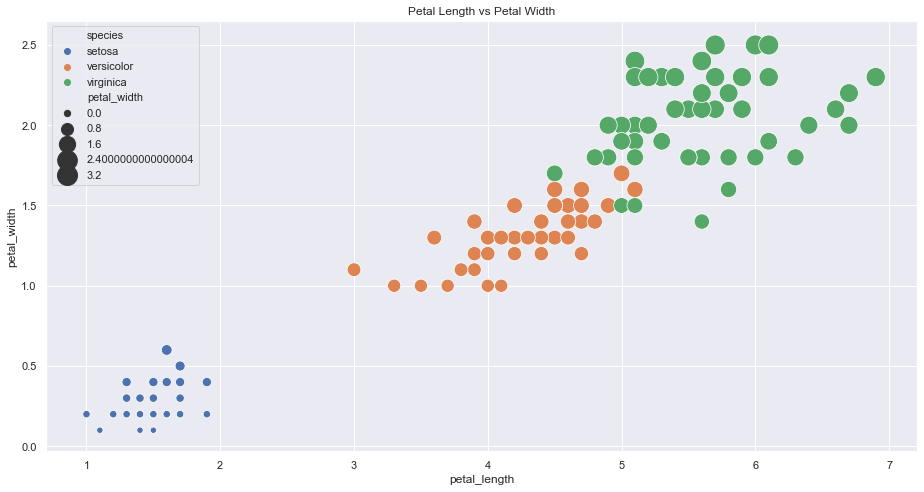

In [279]:
plt.figure(figsize=(13,7))
sns.scatterplot(x="petal_length", y="petal_width", data = df, size="petal_width", hue = "species", 
             sizes=(40, 400))
plt.title("Petal Length vs Petal Width")
plt.tight_layout()
plt.show()

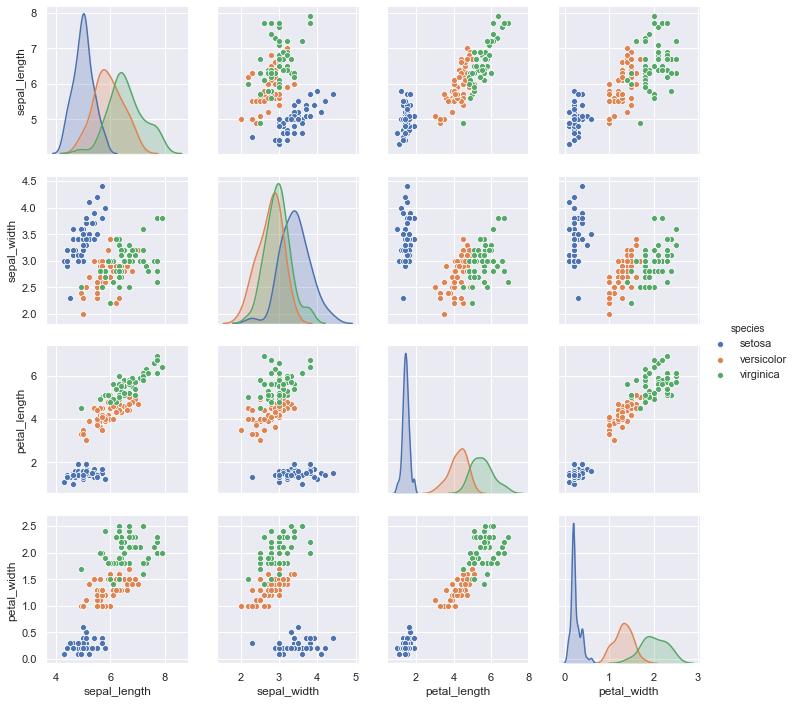

In [271]:
sns.pairplot(df, hue = "species")

Setosa has smaller petal length and width. It has greater sepal width then others but sepal length is low.

Vesicolor lies in the middle. Its sepal/petal length and width are normal/average sized.

Virgnicia has high values except for sepal width



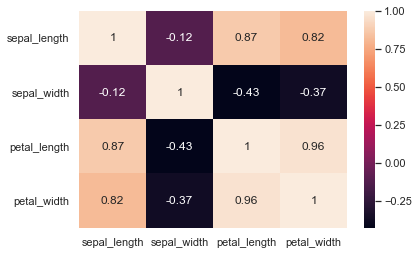

In [277]:
corr = df.corr()
sns.heatmap(corr, annot= True)

In [211]:
df1 = df.copy()

Splitting Data

In [212]:
X = df1.drop("species",axis=1)
y = df1["species"]
sc = StandardScaler()
X = sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

Initializing classifier

In [213]:
svc_model = SVC(gamma="auto")
svc_model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [214]:
predictions = svc_model.predict(X_test)

Evaluation

In [238]:
def evalModel(model):
    print("Testing Accuracy: {:.5f}".format(model.score(X_test, y_test)))
    print("Training Accuracy: {:.5f}".format(model.score(X_train, y_train)))
    print("\nConfusion Matrix")
    predictions = svc_model.predict(X_test)
    print(confusion_matrix(y_test,predictions))
    print("\nClassifiation Report")
    print(classification_report(y_test,predictions))

In [239]:
evalModel(svc_model)

Testing Accuracy: 0.97778
Training Accuracy: 0.97143

Confusion Matrix
[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]

Classifiation Report
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.95      0.97        20
   virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Making prediction

In [226]:
def makePred():
    sl = float(input("Enter sepal length: "))
    sw = float(input("Enter sepal width: "))
    pl = float(input("Enter petal length: "))
    pw = float(input("Enter petal width: "))
    
    pred = svc_model.predict([[sl, sw, pl, pw]])
    print("----------------")
    print("Predicted class:",pred[0])
    print("----------------")
    

In [227]:
makePred()

Enter sepal length: 1
Enter sepal width: 2
Enter petal length: 3
Enter petal width: 4
----------------
Predicted class: virginica
----------------


Bagging 

In [220]:
from sklearn.ensemble import BaggingClassifier


In [221]:
bg_clf = BaggingClassifier(svc_model, n_estimators=10)

In [222]:
bg_clf.fit(X_train, y_train)

BaggingClassifier(base_estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                     coef0=0.0, decision_function_shape='ovr',
                                     degree=3, gamma='auto', kernel='rbf',
                                     max_iter=-1, probability=False,
                                     random_state=None, shrinking=True,
                                     tol=0.001, verbose=False),
                  bootstrap=True, bootstrap_features=False, max_features=1.0,
                  max_samples=1.0, n_estimators=10, n_jobs=None,
                  oob_score=False, random_state=None, verbose=0,
                  warm_start=False)

In [240]:
evalModel(bg_clf)

Testing Accuracy: 1.00000
Training Accuracy: 0.97143

Confusion Matrix
[[13  0  0]
 [ 0 19  1]
 [ 0  0 12]]

Classifiation Report
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.95      0.97        20
   virginica       0.92      1.00      0.96        12

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45



Note: (we might not get 100% accuracy if we change the random state) 

Hypertuning 

In [241]:
from sklearn.model_selection import GridSearchCV

In [280]:
def hyperTune(clf):
    print("Hyper tuning the model..\n")
    params = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']}
    grid_clf = GridSearchCV(clf, params, cv = 7, verbose=True, n_jobs=-1, )
    grid_clf.fit(X_train, y_train)
    print("--------------------------------")
    print("Updated Scores:")
    print("Testing Accuracy: ", grid_clf.score(X_test, y_test))
    print("Training Accuracy: ", grid_clf.score(X_train, y_train))
    print("--------------------------------")
    print("Best Parameters:")
    print(grid_clf.best_params_)
    
    

In [282]:
hyperTune(svc_model)

Hyper tuning the model..

Fitting 7 folds for each of 25 candidates, totalling 175 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.


--------------------------------
Updated Scores:
Testing Accuracy:  0.9777777777777777
Training Accuracy:  0.9809523809523809
--------------------------------
Best Parameters:
{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}


[Parallel(n_jobs=-1)]: Done 160 out of 175 | elapsed:    0.3s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done 175 out of 175 | elapsed:    0.3s finished
